# Traitements HTML et XML (Chap 8)

## Analyse XML et HTML

In [1]:
from lxml import objectify
import pandas as pd
from distutils import util

xml = objectify.parse(open('XMLData.xml'))
root = xml.getroot()
df = pd.DataFrame(columns=('Number', 'Boolean'))

for i in range(0, 4):
    obj = root.getchildren()[i].getchildren()
    row = dict(zip(['Number', 'Boolean'], 
                   [obj[0].pyval, 
                    bool(util.strtobool(obj[2].text))]))
    row_s = pd.Series(row)
    row_s.name = obj[1].text
    df = df.append(row_s)
    
print(type(df.loc['Primo']['Number']))
print(type(df.loc['Primo']['Boolean']))

<class 'int'>
<class 'bool'>


## Extraction de données avec XPath

In [2]:
from lxml import objectify
import pandas as pd
from distutils import util

xml = objectify.parse(open('XMLData.xml'))
root = xml.getroot()

map_number = map(int, root.xpath('Record/Number'))
map_bool = map(str, root.xpath('Record/Boolean'))
map_bool = map(util.strtobool, map_bool)
map_bool = map(bool, map_bool)
map_string = map(str, root.xpath('Record/String'))

data = list(zip(map_number, map_bool))

df = pd.DataFrame(data, 
                  columns=('Number', 'Boolean'), 
                  index = list(map_string))

print(df)
print(type(df.loc['Primo']['Number']))
print(type(df.loc['Primo']['Boolean']))

         Number  Boolean
Primo         1     True
Secundo       2    False
Tercio        3     True
Quarto        4    False
<class 'numpy.int64'>
<class 'numpy.bool_'>


# Épuration de fichiers texte bruts

## Racinisation et suppression des mots vides

In [3]:
from sklearn.feature_extraction.text import * 
from nltk import word_tokenize          
from nltk.stem.porter import PorterStemmer

stemmer = PorterStemmer()

def stem_tokens(tokens, stemmer):
    stemmed = []
    for item in tokens:
        stemmed.append(stemmer.stem(item))
    return stemmed

def tokenize(text):
    tokens = word_tokenize(text)
    stems = stem_tokens(tokens, stemmer)
    return stems

vocab = ['Sam loves swimming so he swims all the time']
vect = CountVectorizer(tokenizer=tokenize, 
                           stop_words='english')
vec = vect.fit(vocab)

sentence1 = vec.transform(['George loves swimming too!'])

print(vec.get_feature_names())
print(sentence1.toarray())

['love', 'sam', 'swim', 'time']
[[1 0 1 0]]


## N.d.T. : Le même en français

In [4]:
from sklearn.feature_extraction.text import * 
from nltk import word_tokenize          
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords       # NOUVEAU

stemmer = PorterStemmer()

def stem_tokens(tokens, stemmer):
    stemmed = []
    for item in tokens:
        stemmed.append(stemmer.stem(item))
    return stemmed

def tokenize(text):
    tokens = word_tokenize(text)
    stems = stem_tokens(tokens, stemmer)
    return stems

fliste = set(stopwords.words('french')) # NOUVEAU

vocab = ['Simon adore nager et nage en rivière']
vect = CountVectorizer(tokenizer=tokenize, analyzer='word', stop_words=fliste) # MODIF
vec = vect.fit(vocab)

sentence1 = vec.transform(['Leonard adore nager aussi !'])

print(vec.get_feature_names())
print(sentence1.toarray())

['ador', 'nage', 'nager', 'rivièr', 'simon']
[[1 0 1 0 0]]


## Expressions régulières

In [5]:
import re

data1 = 'Mon numéro est le 800-555-1212.'
data2 = '800-555-1234 est mon téléphone perso.'

pattern = re.compile(r'(\d{3})-(\d{3})-(\d{4})')

dmatch1 = pattern.search(data1).groups()
dmatch2 = pattern.search(data2).groups()

print(dmatch1)
print(dmatch2)

('800', '555', '1212')
('800', '555', '1234')


## Le même en français

In [6]:
import re

data1 = 'Mon numéro est le 07-12-34-56-78.'
data2 = '07-12-34-56-78 est mon téléphone perso.'

pattern = re.compile(r'(\d{2})-(\d{2})-(\d{2})-(\d{2})-(\d{2})')

dmatch1 = pattern.search(data1).groups()
dmatch2 = pattern.search(data2).groups()

print(dmatch1)
print(dmatch2)

('07', '12', '34', '56', '78')
('07', '12', '34', '56', '78')


# Sacs de mots et analyse lexicale

## Principe du sac de mots

In [7]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import *

categories = ['comp.graphics', 'misc.forsale', 
              'rec.autos', 'sci.space']
twenty_train = fetch_20newsgroups(subset='train',
                                  categories=categories, 
                                  shuffle=True, 
                                  random_state=42)

count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(
    twenty_train.data)

print("Profil BOW:", X_train_counts.shape)
caltech_idx = count_vect.vocabulary_['caltech']
print('"Caltech": %i' % X_train_counts[0, caltech_idx]) 

Profil BOW: (2356, 34750)
"Caltech": 3


## Utilisation des N-grammes

In [8]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import *

categories = ['sci.space']

twenty_train = fetch_20newsgroups(subset='train', 
                                  categories=categories, 
                                  remove=('headers', 
                                          'footers', 
                                          'quotes'),
                                  shuffle=True, 
                                  random_state=42)

count_chars = CountVectorizer(analyzer='char_wb', 
                              ngram_range=(3,3), 
                              max_features=10)

count_chars.fit(twenty_train['data'])

count_words = CountVectorizer(analyzer='word', 
                              ngram_range=(2,2),
                              max_features=10,
                              stop_words='english')

count_words.fit(twenty_train['data'])

X = count_chars.transform(twenty_train.data)

print(count_words.get_feature_names())
print(X[1].todense())
print(count_words.get_feature_names())

['anonymous ftp', 'commercial space', 'gamma ray', 'nasa gov', 'national space', 'remote sensing', 'sci space', 'space shuttle', 'space station', 'washington dc']
[[0 0 2 5 1 4 2 2 0 5]]
['anonymous ftp', 'commercial space', 'gamma ray', 'nasa gov', 'national space', 'remote sensing', 'sci space', 'space shuttle', 'space station', 'washington dc']


## Transformations TF-IDF

In [9]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import *

categories = ['comp.graphics', 'misc.forsale', 
              'rec.autos', 'sci.space']
twenty_train = fetch_20newsgroups(subset='train',
                                  categories=categories, 
                                  shuffle=True, 
                                  random_state=42)

count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(
    twenty_train.data)

tfidf = TfidfTransformer().fit(X_train_counts)
X_train_tfidf = tfidf.transform(X_train_counts)

caltech_idx = count_vect.vocabulary_['caltech']
print('Score de "Caltech" dans un BOW:')
print('count: %0.3f' % X_train_counts[0, caltech_idx])
print('TF-IDF: %0.3f' % X_train_tfidf[0, caltech_idx])

Score de "Caltech" dans un BOW:
count: 3.000
TF-IDF: 0.123


In [10]:
import numpy as np
count = np.mean(X_train_counts[X_train_counts>0])
tfif = np.mean(X_train_tfidf[X_train_tfidf>0])
print('moyenne de count: %0.3f' % np.mean(count))
print('moyenne de TF-IDF: %0.3f' % np.mean(tfif))

moyenne de count: 1.698
moyenne de TF-IDF: 0.064


# Traitement de donnés graphiques

## Découverte de NetworkX

In [11]:
import networkx as nx

G = nx.cycle_graph(10)
A = nx.adjacency_matrix(G)

print(A.todense())

[[0 1 0 0 0 0 0 0 0 1]
 [1 0 1 0 0 0 0 0 0 0]
 [0 1 0 1 0 0 0 0 0 0]
 [0 0 1 0 1 0 0 0 0 0]
 [0 0 0 1 0 1 0 0 0 0]
 [0 0 0 0 1 0 1 0 0 0]
 [0 0 0 0 0 1 0 1 0 0]
 [0 0 0 0 0 0 1 0 1 0]
 [0 0 0 0 0 0 0 1 0 1]
 [1 0 0 0 0 0 0 0 1 0]]


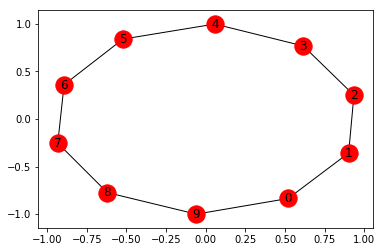

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
nx.draw_networkx(G)
plt.show()

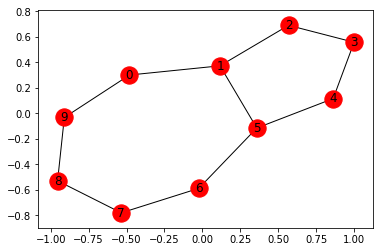

In [13]:
G.add_edge(1,5)
nx.draw_networkx(G)
plt.show()